<a href="https://colab.research.google.com/github/maheshbabu-r/BIG_DATA_PySpark/blob/main/CreditCard_Lead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform Logistic regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# DownLoad the DataSet
!wget -q "https://github.com/maheshbabu-r/BinaryClassification_Maveric/raw/main/archive%20-Job%20a%20Thon_Mahesh%20(Mentor-Prathmesh).zip"

# UnZip the dowloaded file
!unzip -q "archive -Job a Thon_Mahesh (Mentor-Prathmesh).zip"

# Remove the ZipFile
!rm "archive -Job a Thon_Mahesh (Mentor-Prathmesh).zip"

In [3]:
#Load train DataSet Into DataFrame
df=pd.read_csv("/content/train.csv")

df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
#Load test DataSet Into DataFrame
test=pd.read_csv("/content/test.csv")

test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
# Check Shape
df.shape

(245725, 11)

In [6]:
# Check summary of DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
# Describe Numerical variables
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
# check Null values 
df.isnull().mean()*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

> only <b>Credit_Product</b>  is having null values

In [9]:
# check credit Product
df.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [10]:
# fill nullvalues using mode 
df["Credit_Product"]=df["Credit_Product"].fillna(df["Credit_Product"].mode()[0])

In [11]:
# ID column is unique for all records so droping 
print(len(df.ID.unique()))
df.drop("ID",1,inplace=True)

245725


In [12]:
# check Null values 
df.isnull().mean()*100

Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

In [13]:
df["Is_Lead"].value_counts(normalize=True)*100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

# Visualize the variables

# smote or adasyn need to be added

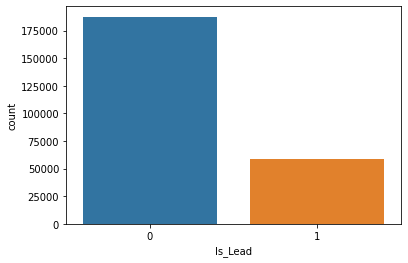

In [14]:
# check for class balance
sns.countplot(df["Is_Lead"]);

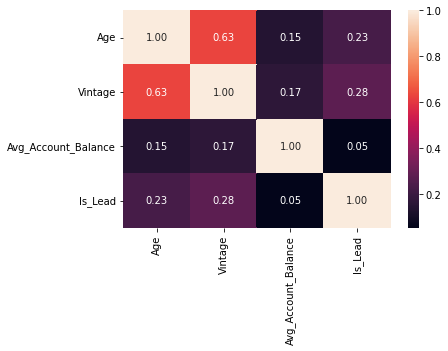

In [15]:
# correlation
sns.heatmap(df.corr(),annot=True,fmt="0.2f");

In [16]:
num = df.select_dtypes("number").columns
cat = df.select_dtypes("object").columns

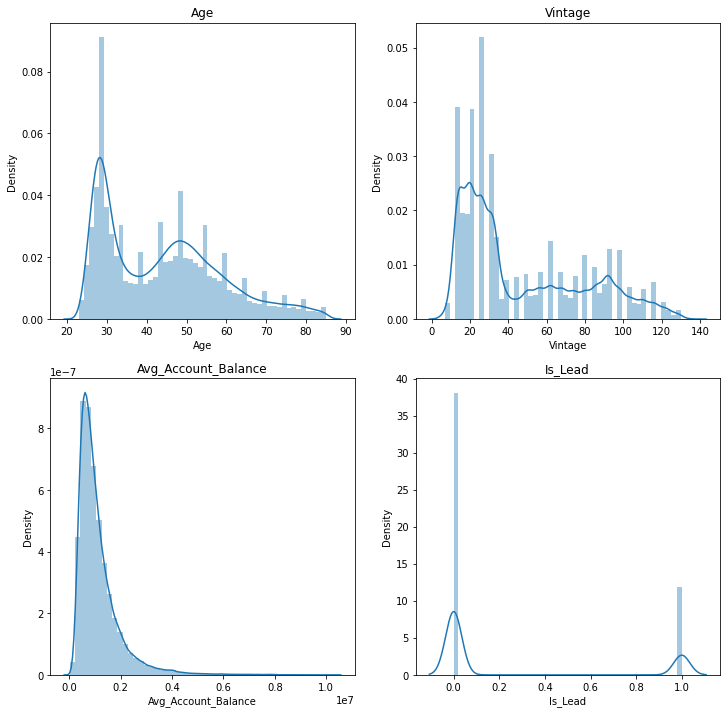

In [17]:
#Plotting distribution plot of all numerical columns
plt.figure(figsize=(12,12))
for i,col in enumerate(num):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col]).set(title=col)

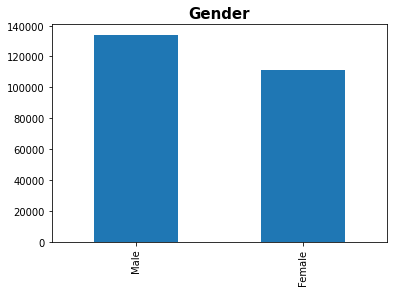

Gender


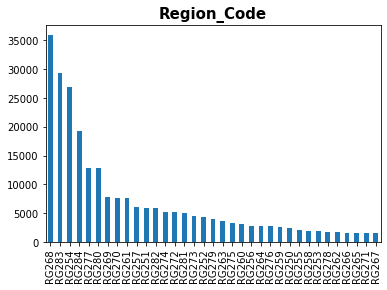

Region_Code


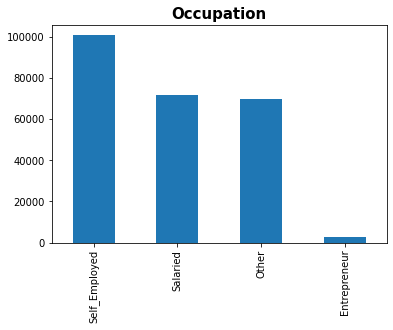

Occupation


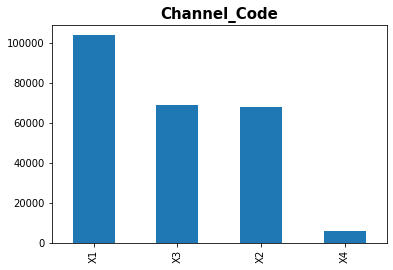

Channel_Code


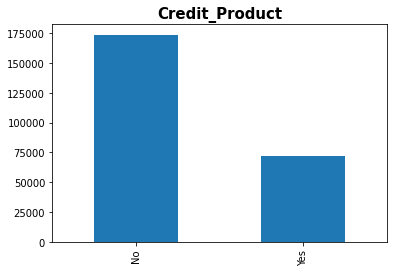

Credit_Product


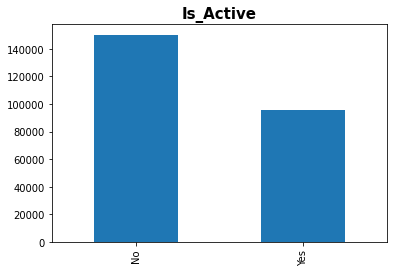

Is_Active


In [18]:
for col in cat:
    df[col].value_counts().plot(kind='bar')
    plt.title(col,fontsize = 15,fontweight='bold')
    plt.show()
    print(col)

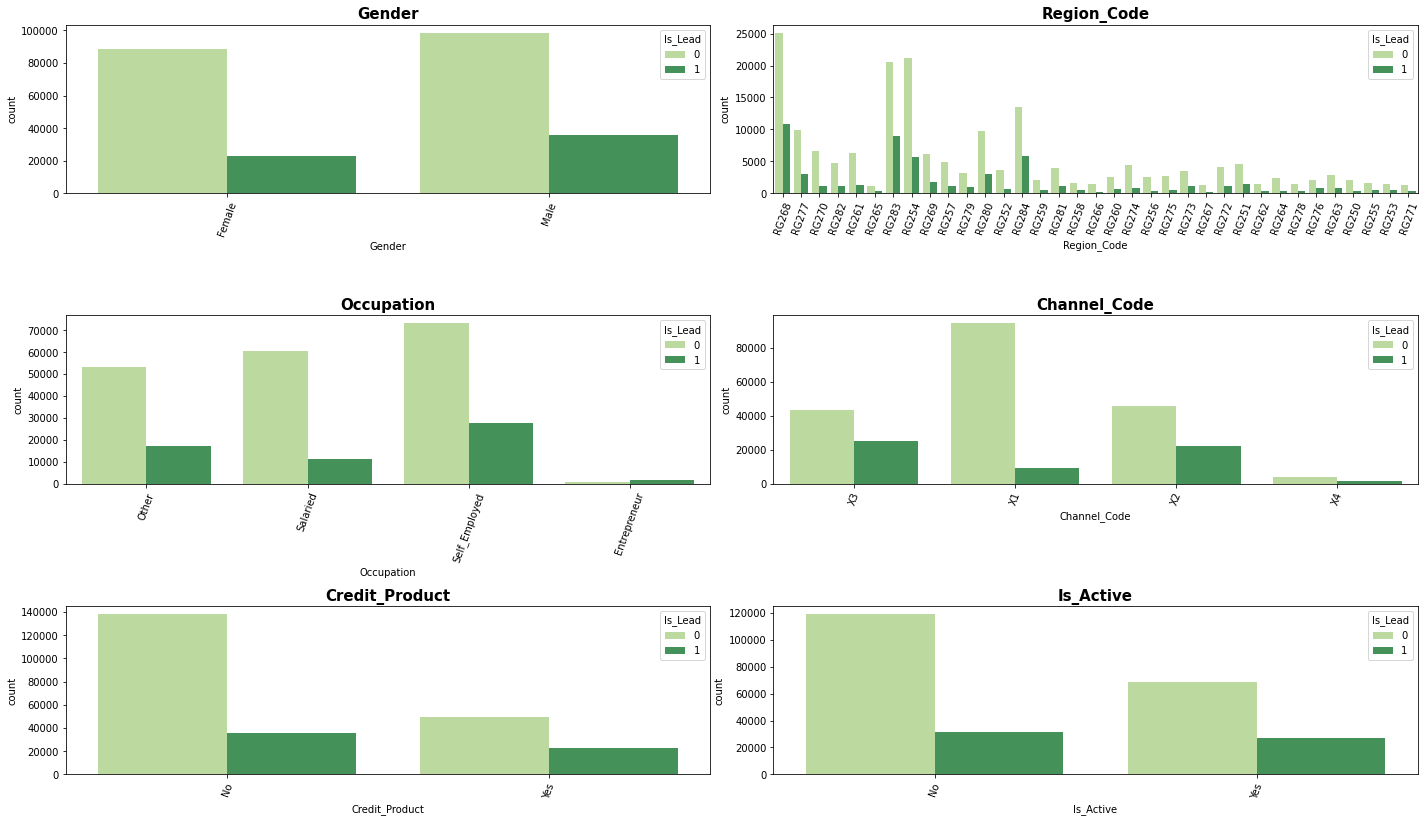

In [19]:
# categories which are making to lead
fig=plt.figure(figsize=[20,15])
fig.subplots_adjust(hspace=0.8,wspace=1.5)
for i in range(0,len(cat)):
    ax=fig.add_subplot(4,2,i+1)
    plt.title(cat[i],fontsize = 15,fontweight='bold')
    plt.tight_layout()
    plt.xticks(rotation=70)
    sns.countplot(x=cat[i], hue="Is_Lead", data=df,palette='YlGn')

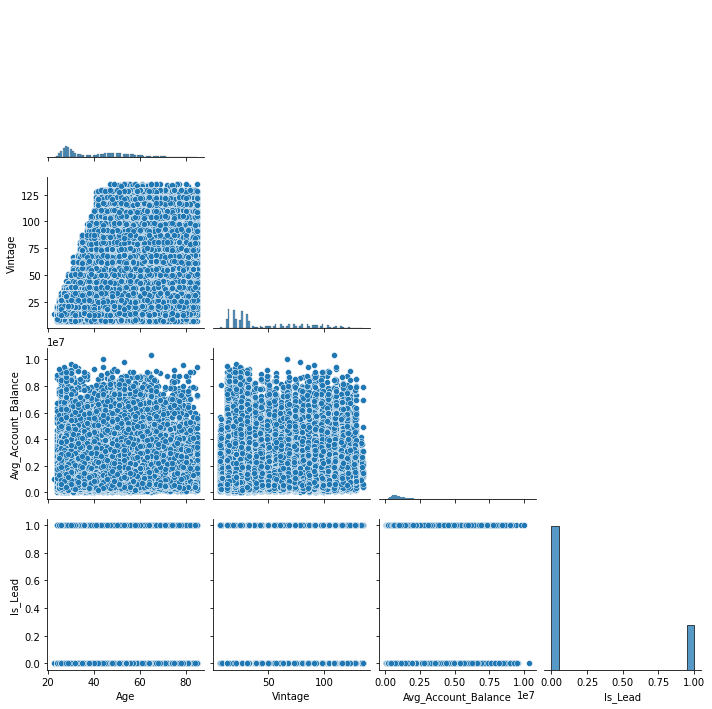

In [20]:
sns.pairplot(df,corner=True);

# Data Preparation

In [21]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [22]:
df.Age.describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

In [23]:
# converting numerical columns into categorical
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_groups'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
df.age_groups.value_counts()

# drop Age column
df.drop("Age",1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Gender               245725 non-null  object  
 1   Region_Code          245725 non-null  object  
 2   Occupation           245725 non-null  object  
 3   Channel_Code         245725 non-null  object  
 4   Vintage              245725 non-null  int64   
 5   Credit_Product       245725 non-null  object  
 6   Avg_Account_Balance  245725 non-null  int64   
 7   Is_Active            245725 non-null  object  
 8   Is_Lead              245725 non-null  int64   
 9   age_groups           245725 non-null  category
dtypes: category(1), int64(3), object(6)
memory usage: 17.1+ MB


In [25]:
values = df['Region_Code'].value_counts(dropna=False).keys().tolist()
counts = df['Region_Code'].value_counts(dropna=False).tolist()
value_dict1 = dict(zip(values, counts))
print(value_dict1)


d = dict((k, v) for k, v in value_dict1.items() if v <= 2500)
replace=d.keys()
With_999=['RG255']*len(replace)

replace_dict1=dict(zip(replace,With_999))
print(replace_dict1)


df["Region_Code"].replace(replace_dict1, inplace=True)

len(df["Region_Code"].value_counts())

{'RG268': 35934, 'RG283': 29416, 'RG254': 26840, 'RG284': 19320, 'RG277': 12826, 'RG280': 12775, 'RG269': 7863, 'RG270': 7720, 'RG261': 7633, 'RG257': 6101, 'RG251': 5950, 'RG282': 5829, 'RG274': 5286, 'RG272': 5252, 'RG281': 5093, 'RG273': 4497, 'RG252': 4286, 'RG279': 3976, 'RG263': 3687, 'RG275': 3245, 'RG260': 3110, 'RG256': 2847, 'RG264': 2793, 'RG276': 2764, 'RG259': 2586, 'RG250': 2496, 'RG255': 2018, 'RG258': 1951, 'RG253': 1858, 'RG278': 1822, 'RG262': 1788, 'RG266': 1578, 'RG265': 1546, 'RG271': 1542, 'RG267': 1497}
{'RG250': 'RG255', 'RG255': 'RG255', 'RG258': 'RG255', 'RG253': 'RG255', 'RG278': 'RG255', 'RG262': 'RG255', 'RG266': 'RG255', 'RG265': 'RG255', 'RG271': 'RG255', 'RG267': 'RG255'}


26

In [26]:
df.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG255    18096
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
Name: Region_Code, dtype: int64

In [27]:
df.head()

,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,age_groups
0,Female,RG268,Other,X3,43,No,1045696,No,0,70+
1,Female,RG277,Salaried,X1,32,No,581988,No,0,18-29
2,Female,RG268,Self_Employed,X3,26,No,1484315,Yes,0,50-59
3,Male,RG270,Salaried,X1,19,No,470454,No,0,30-39
4,Female,RG282,Salaried,X1,33,No,886787,No,0,18-29


In [28]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dum = pd.get_dummies(df[['Gender', 'Region_Code', 'Occupation','Channel_Code','Credit_Product','Is_Active','age_groups']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df, dum], axis=1)

In [29]:
df1.drop(['Gender', 'Region_Code', 'Occupation','Channel_Code','Credit_Product','Is_Active','age_groups'],axis=1,inplace=True)

## Test-Train Split

In [30]:
# Putting feature variable to X
X = df1.drop(['Is_Lead'], axis=1)

X.head()

,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG252,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG263,Region_Code_RG264,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,age_groups_30-39,age_groups_40-49,age_groups_50-59,age_groups_60-69,age_groups_70+
0,43,1045696,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,32,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,26,1484315,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
3,19,470454,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,33,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Putting response variable to y
y = df['Is_Lead']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [32]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

####  Feature Scaling

In [33]:
scaler = StandardScaler()

X_train[['Avg_Account_Balance','Vintage']] = scaler.fit_transform(X_train[['Avg_Account_Balance','Vintage']])
X_train.head()

,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG252,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG263,Region_Code_RG264,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,age_groups_30-39,age_groups_40-49,age_groups_50-59,age_groups_60-69,age_groups_70+
46064,-0.833852,-0.654257,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
68353,-0.864776,-1.050747,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
168069,-0.462776,-0.795475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
49398,2.134760,0.459318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
207782,-0.493699,-0.503051,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [34]:
X_test[['Avg_Account_Balance','Vintage']] = scaler.transform(X_test[['Avg_Account_Balance','Vintage']])
X_test.head()

,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG252,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG263,Region_Code_RG264,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,age_groups_30-39,age_groups_40-49,age_groups_50-59,age_groups_60-69,age_groups_70+
167634,-0.493699,0.029082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
149158,-0.493699,3.840392,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21619,-1.019391,1.548852,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
203203,0.279377,0.149318,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
144909,0.866915,-0.432988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0


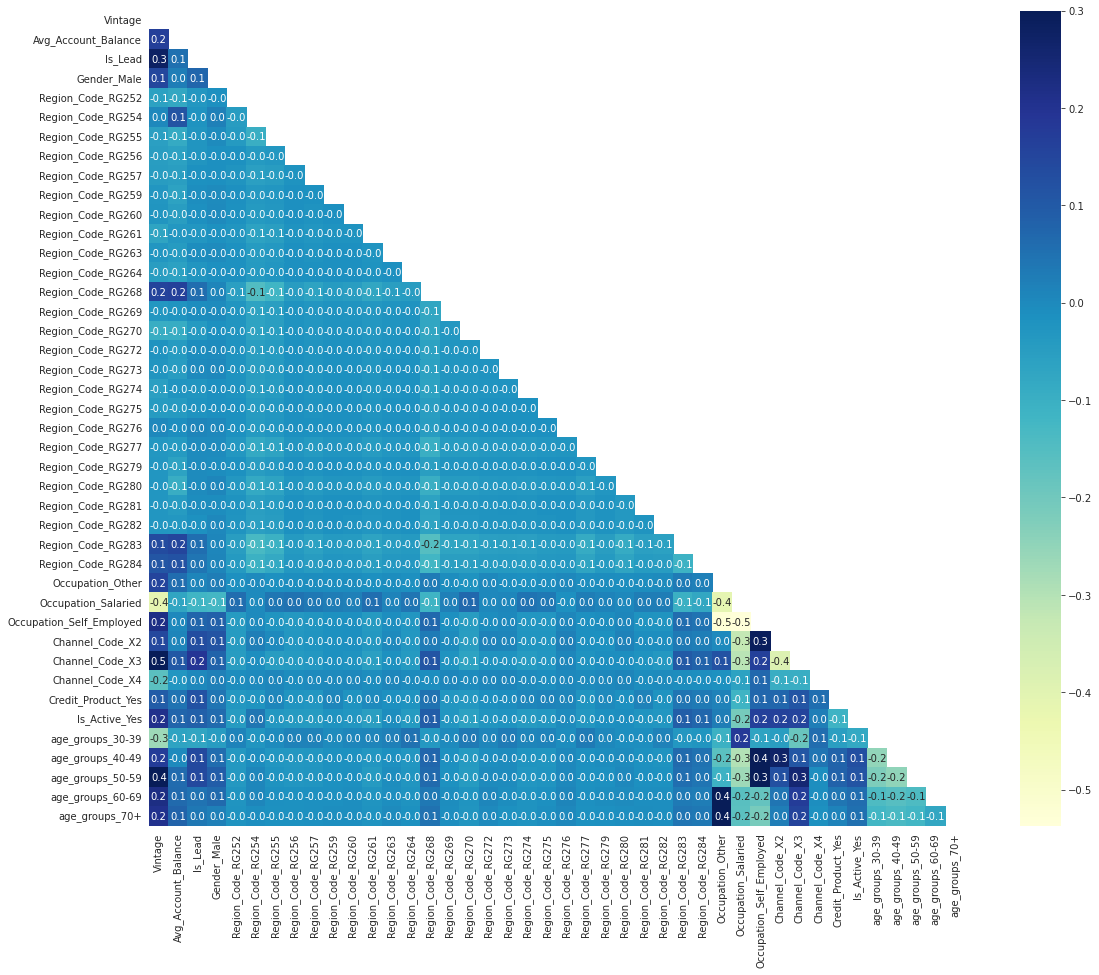

In [35]:
# lets check the correlation between different features

mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,15))
    ax = sns.heatmap(df1.corr(), mask=mask, vmax=.3, square=True,annot=True,cmap='YlGnBu',fmt=".1f")

# Model 1

In [36]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               172007
Model:                            GLM   Df Residuals:                   171965
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81740.
Date:                Tue, 28 Sep 2021   Deviance:                   1.6348e+05
Time:                        09:20:01   Pearson chi2:                 1.78e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.2505      0.071    -31.830      0.000      -2.389      -2.112
Vintage                      0.3017      0.008     37.385      0.000       0.286       0.318
Avg_Account_Balance          0.0078      0.006      1.217      0.223      -0.005       0.020
Gender_Male                  0.0507      0.013      4.010      0.000       0.026       0.075
Region_Code_RG252           -0.1165      0.070     -1.673      0.094      -0.253       0.020
Region_Code_RG254           -0.1481      0.044     -3.370      0.001      -0.234      -0.062
Region_Code_RG255           -0.0282      0.046     -0.615      0.538      -0.118       0.062
Region_Code_RG256           -0.1453      0.081     -1.804      0.071      -0.303       0.013
Region_Code_RG257            0.0693      0.057      1.208      0.227      -0.043       0.182
Region_Code_RG259            0.0593      0.074      0.796      0.426      -0.087       0.205
Region_Code_RG260           -0.0506      0.071     -0.714      0.475      -0.189       0.088
Region_Code_RG261           -0.0457      0.056     -0.815      0.415      -0.156       0.064
Region_Code_RG263            0.0288      0.065      0.446      0.656      -0.098       0.155
Region_Code_RG264           -0.1334      0.078     -1.700      0.089      -0.287       0.020
Region_Code_RG268            0.0544      0.042      1.285      0.199      -0.029       0.137
Region_Code_RG269            0.1023      0.052      1.952      0.051      -0.000       0.205
Region_Code_RG270           -0.0503      0.057     -0.884      0.377      -0.162       0.061
Region_Code_RG272           -0.0370      0.058     -0.637      0.524      -0.151       0.077
Region_Code_RG273            0.0999      0.060      1.673      0.094      -0.017       0.217
Region_Code_RG274           -0.0243      0.061     -0.397      0.692      -0.145       0.096
Region_Code_RG275           -0.0764      0.073     -1.052      0.293      -0.219       0.066
Region_Code_RG276            0.1165      0.067      1.739      0.082      -0.015       0.248
Region_Code_RG277            0.1262      0.048      2.653      0.008       0.033       0.219
Region_Code_RG279            0.1849      0.063      2.945      0.003       0.062       0.308
Region_Code_RG280            0.0532      0.047      1.121      0.262      -0.040       0.146
Region_Code_RG281            0.0913      0.059      1.550      0.121      -0.024       0.207
Region_Code_RG282           -0.0751      0.058     -1.292      0.196      -0.189       0.039
Region_Code_RG283            0.0755      0.043      1.761      0.078      -0.009       0.159
Region_Code_RG284            0.0833      0.044      1.874      0.061      -0.004       0.170
Occupation_Other            -1.0638      0.053    -19.968      0.000      -1.168      -0.959
Occupation_Sal

### Feature Selection Using RFE

In [37]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [38]:
rfe.support_

array([ True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Vintage', True, 1),
 ('Avg_Account_Balance', False, 27),
 ('Gender_Male', False, 16),
 ('Region_Code_RG252', False, 14),
 ('Region_Code_RG254', True, 1),
 ('Region_Code_RG255', False, 24),
 ('Region_Code_RG256', True, 1),
 ('Region_Code_RG257', False, 10),
 ('Region_Code_RG259', False, 12),
 ('Region_Code_RG260', False, 21),
 ('Region_Code_RG261', False, 22),
 ('Region_Code_RG263', False, 15),
 ('Region_Code_RG264', True, 1),
 ('Region_Code_RG268', False, 11),
 ('Region_Code_RG269', False, 5),
 ('Region_Code_RG270', False, 20),
 ('Region_Code_RG272', False, 23),
 ('Region_Code_RG273', False, 6),
 ('Region_Code_RG274', False, 25),
 ('Region_Code_RG275', False, 17),
 ('Region_Code_RG276', False, 4),
 ('Region_Code_RG277', False, 3),
 ('Region_Code_RG279', False, 2),
 ('Region_Code_RG280', False, 13),
 ('Region_Code_RG281', False, 7),
 ('Region_Code_RG282', False, 18),
 ('Region_Code_RG283', False, 9),
 ('Region_Code_RG284', False, 8),
 ('Occupation_Other', True, 1),
 ('Occupation_Sala

In [40]:
# Adding all supported columns in to col .
col = X_train.columns[rfe.support_]

In [41]:
X_train.columns[~rfe.support_]

Index(['Avg_Account_Balance', 'Gender_Male', 'Region_Code_RG252',
       'Region_Code_RG255', 'Region_Code_RG257', 'Region_Code_RG259',
       'Region_Code_RG260', 'Region_Code_RG261', 'Region_Code_RG263',
       'Region_Code_RG268', 'Region_Code_RG269', 'Region_Code_RG270',
       'Region_Code_RG272', 'Region_Code_RG273', 'Region_Code_RG274',
       'Region_Code_RG275', 'Region_Code_RG276', 'Region_Code_RG277',
       'Region_Code_RG279', 'Region_Code_RG280', 'Region_Code_RG281',
       'Region_Code_RG282', 'Region_Code_RG283', 'Region_Code_RG284',
       'Occupation_Salaried', 'Is_Active_Yes'],
      dtype='object')

## Model 2

In [42]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               172007
Model:                            GLM   Df Residuals:                   171991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81795.
Date:                Tue, 28 Sep 2021   Deviance:                   1.6359e+05
Time:                        09:20:50   Pearson chi2:                 1.78e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.2039      0.020   -110.569      0.000      -2.243      -2.165
Vintage                      0.3084      0.008     38.689      0.000       0.293       0.324
Region_Code_RG254           -0.1896      0.020     -9.351      0.000      -0.229      -0.150
Region_Code_RG256           -0.1912      0.071     -2.705      0.007      -0.330      -0.053
Region_Code_RG264           -0.1792      0.068     -2.624      0.009      -0.313      -0.045
Occupation_Other            -1.0468      0.024    -43.473      0.000      -1.094      -1.000
Occupation_Self_Employed    -1.3224      0.022    -59.097      0.000      -1.366      -1.279
Channel_Code_X2              1.2050      0.024     50.305      0.000       1.158       1.252
Channel_Code_X3              1.1637      0.025     46.805      0.000       1.115       1.212
Channel_Code_X4              1.2238      0.044     28.053      0.000       1.138       1.309
Credit_Product_Yes           0.3069      0.013     23.724      0.000       0.282       0.332
age_groups_30-39             0.8191      0.025     32.272      0.000       0.769       0.869
age_groups_40-49             1.4686      0.031     47.218      0.000       1.408       1.530
age_groups_50-59             1.3825      0.033     42.532      0.000       1.319       1.446
age_groups_60-69             0.9609      0.037     26.085      0.000       0.889       1.033
age_groups_70+               0.9908      0.039     25.257      0.000       0.914       1.068
============================================================================================
"""

In [43]:
# checking VIF's
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Channel_Code_X3,4.00
5,Occupation_Self_Employed,3.92
11,age_groups_40-49,3.72
6,Channel_Code_X2,3.52
12,age_groups_50-59,3.50
4,Occupation_Other,2.59
13,age_groups_60-69,2.18
14,age_groups_70+,2.00
0,Vintage,1.70
10,age_groups_30-39,1.56


In [44]:
# Checking the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:12]

46064     0.087427
68353     0.028821
168069    0.054684
49398     0.496302
207782    0.375539
219879    0.093921
125458    0.065944
61892     0.065359
133405    0.036694
106092    0.078630
149858    0.641368
243377    0.110323
dtype: float64

In [45]:
# Reshape of predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08742722, 0.02882073, 0.05468398, 0.49630247, 0.37553901,
       0.09392054, 0.06594428, 0.0653592 , 0.036694  , 0.07863046])

In [46]:
y_train_pred_final = pd.DataFrame({'Is_Lead':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Is_Lead,Converted_Prob,LeadId
0,1,0.087427,46064
1,0,0.028821,68353
2,0,0.054684,168069
3,1,0.496302,49398
4,0,0.375539,207782


In [47]:
# Adding a  new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Is_Lead,Converted_Prob,LeadId,predicted
0,1,0.087427,46064,0
1,0,0.028821,68353,0
2,0,0.054684,168069,0
3,1,0.496302,49398,0
4,0,0.375539,207782,0


In [48]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final.predicted )
print(confusion)

[[129148   1983]
 [ 35553   5323]]


In [49]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.predicted))

0.7817763230566198


__Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value__

In [51]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [53]:
print("Statistics for model at cutoff value for Converted_prob > 0.5")
print("")
# Let's check the overall accuracy.
print('Overall_Accuracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Is_Lead,
                                                                   y_train_pred_final.predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.5

Overall_Accuracy :0.78
Sensitivity :0.13
Specificity : 0.98
False positive rate : 0.02
Precision(Positive predictive Value) : 0.73
Negative predictive Value : 0.78

Sensitivity - Specificity : 0.13 , 0.98
Precision - Recall : 0.73 , 0.13
F1 score is : 0.22069767441860466 


##  ROC Curve

In [54]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [55]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Is_Lead, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

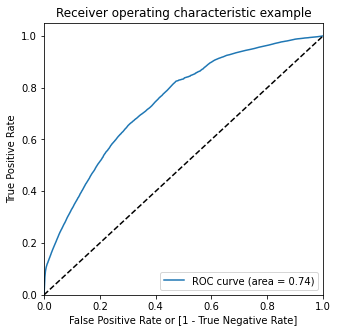

In [56]:
draw_roc(y_train_pred_final.Is_Lead, y_train_pred_final.Converted_Prob)

#### Search of optimal cut off point

In [57]:
# Let's create columns with different probability cutoffs .
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Is_Lead,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.087427,46064,0,1,0,0,0,0,0,0,0,0,0
1,0,0.028821,68353,0,1,0,0,0,0,0,0,0,0,0
2,0,0.054684,168069,0,1,0,0,0,0,0,0,0,0,0
3,1,0.496302,49398,0,1,1,1,1,1,0,0,0,0,0
4,0,0.375539,207782,0,1,1,1,1,0,0,0,0,0,0


In [58]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.237641     1.000000     0.000000
0.1   0.1  0.502462     0.913421     0.374358
0.2   0.2  0.607853     0.802892     0.547056
0.3   0.3  0.694605     0.636828     0.712616
0.4   0.4  0.764754     0.333717     0.899116
0.5   0.5  0.781776     0.130223     0.984878
0.6   0.6  0.778933     0.082493     0.996027
0.7   0.7  0.771562     0.044818     0.998101
0.8   0.8  0.762800     0.001908     0.999985
0.9   0.9  0.762359     0.000000     1.000000


<Figure size 864x576 with 0 Axes>

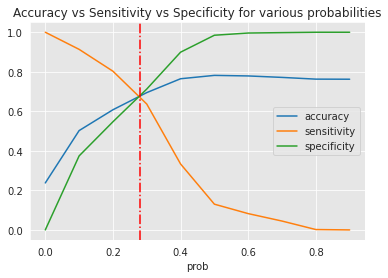

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.axvline(0.28,linestyle='-.',color='r')
plt.title('Accuracy vs Sensitivity vs Specificity for various probabilities')
plt.show()

In [64]:
# Let us make the final prediction using 0.365 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Is_Lead,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.087427,46064,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.028821,68353,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.054684,168069,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.496302,49398,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.375539,207782,0,1,1,1,1,0,0,0,0,0,0,1


In [65]:
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Is_Lead']==1,['Is_Lead','final_predicted']]
checking_df['final_predicted'].value_counts()

1    27766
0    13110
Name: final_predicted, dtype: int64

In [66]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.final_predicted)

0.6735016598161703

In [67]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final.final_predicted )
confusion2

array([[88081, 43050],
       [13110, 27766]])

In [68]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [69]:
print("Statistics for model at cutoff value for Converted_prob > 0.3")
print("")
# Let's check the overall accuracy.
print('Overall_Accuracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Is_Lead, 
                                                                   y_train_pred_final.final_predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.3

Overall_Accuracy :0.67
Sensitivity :0.68
Specificity : 0.67
False positive rate : 0.33
Precision(Positive predictive Value) : 0.39
Negative predictive Value : 0.87

Sensitivity - Specificity : 0.68 , 0.67
Precision - Recall : 0.39 , 0.68
F1 score is : 0.4957009345794393 


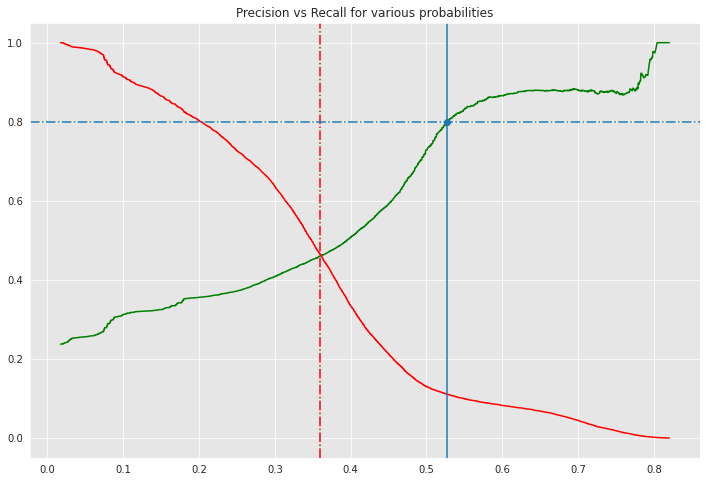

In [71]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Is_Lead, y_train_pred_final.Converted_Prob)
plt.figure(figsize=(12,8))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision vs Recall for various probabilities')
plt.axvline(0.36,linestyle='-.',color='r')  #optimal cutoff as per the curve

plt.plot(np.interp (0.80, p[:-1], thresholds),0.8,'o')  # need to find threshold where precision is 0.8
plt.axhline(0.80,linestyle='-.')
plt.axvline(np.interp (0.80, p[:-1], thresholds))
plt.show()

# Check on the test set

In [72]:
X_test = X_test[col]
X_test.head()

,Vintage,Region_Code_RG254,Region_Code_RG256,Region_Code_RG264,Occupation_Other,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,age_groups_30-39,age_groups_40-49,age_groups_50-59,age_groups_60-69,age_groups_70+
167634,-0.493699,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149158,-0.493699,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21619,-1.019391,0,0,0,1,0,0,0,0,0,0,0,0,0,0
203203,0.279377,1,0,0,0,1,1,0,0,1,0,0,1,0,0
144909,0.866915,0,0,0,0,1,1,0,0,0,0,0,1,0,0


In [73]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [74]:
y_test_pred[:10]

167634    0.086576
149158    0.072709
21619     0.027515
203203    0.324022
144909    0.338186
192646    0.312026
150575    0.054684
166460    0.406000
141762    0.083606
192782    0.105728
dtype: float64

In [75]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [76]:
# Let's see the head

y_pred_1.head()

,0
167634,0.086576
149158,0.072709
21619,0.027515
203203,0.324022
144909,0.338186


In [77]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [78]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [79]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [80]:
# Appending y_test_df and y_pred_1

y_pred_final1 = pd.concat([y_test_df, y_pred_1],axis=1)

In [81]:
y_pred_final1.head()

,Is_Lead,LeadId,0
0,0,167634,0.086576
1,0,149158,0.072709
2,0,21619,0.027515
3,1,203203,0.324022
4,0,144909,0.338186


In [82]:
# Renaming the column 

y_pred_final1= y_pred_final1.rename(columns={ 0 : 'Converted_Prob'})

In [83]:
y_pred_final1.head()

,Is_Lead,LeadId,Converted_Prob
0,0,167634,0.086576
1,0,149158,0.072709
2,0,21619,0.027515
3,1,203203,0.324022
4,0,144909,0.338186


In [85]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.365%

y_pred_final1['final_predicted'] = y_pred_final1.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [86]:
y_pred_final1.head()

,Is_Lead,LeadId,Converted_Prob,final_predicted
0,0,167634,0.086576,0
1,0,149158,0.072709,0
2,0,21619,0.027515,0
3,1,203203,0.324022,0
4,0,144909,0.338186,0


In [87]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final1.loc[y_pred_final1['Is_Lead']==1,['Is_Lead','final_predicted']]
checking_test_df['final_predicted'].value_counts()

0    9371
1    8041
Name: final_predicted, dtype: int64

In [88]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final1.Is_Lead, y_pred_final1.final_predicted)

0.7424645269811986

In [89]:
confusion2 = metrics.confusion_matrix(y_pred_final1.Is_Lead, y_pred_final1.final_predicted )
confusion2

array([[46692,  9614],
       [ 9371,  8041]])

In [90]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
print("Statistics for model at cutoff value for Converted_prob > 0.36")
print("")
# Let's check the overall accuracy.
print('Overall_Accuracy :{0}'.format(round(metrics.accuracy_score(y_pred_final1.Is_Lead,
                                                                  y_pred_final1.final_predicted),2)))
sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.36

Overall_Accuracy :0.74
Sensitivity :0.46
Specificity : 0.83
False positive rate : 0.17
Precision(Positive predictive Value) : 0.46
Negative predictive Value : 0.83

Sensitivity - Specificity : 0.46 , 0.83
Precision - Recall : 0.46 , 0.46
F1 score is : 0.46 


# Real Test Data

In [94]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [95]:
test.isnull().mean()*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [96]:
# fill nullvalues using mode 
test["Credit_Product"]=test["Credit_Product"].fillna(test["Credit_Product"].mode()[0])

In [97]:
test.isnull().mean()*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
dtype: float64

In [118]:
df=test.copy()

In [119]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [120]:
# converting numerical columns into categorical
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_groups'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
df.age_groups.value_counts()

# drop Age column
df.drop("Age",1,inplace=True)

In [121]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dum = pd.get_dummies(df[['Gender', 'Region_Code', 'Occupation','Channel_Code','Credit_Product','Is_Active','age_groups']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df, dum], axis=1)

In [122]:
df1.drop(['Gender', 'Region_Code', 'Occupation','Channel_Code','Credit_Product','Is_Active','age_groups'],axis=1,inplace=True)

In [123]:
df1.head()

,ID,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,age_groups_30-39,age_groups_40-49,age_groups_50-59,age_groups_60-69,age_groups_70+
0,VBENBARO,25,742366,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,CCMEWNKY,49,925537,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,VK3KGA9M,14,215949,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,TT8RPZVC,33,868070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,SHQZEYTZ,19,657087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
df1[['Vintage','Avg_Account_Balance']] = scaler.transform(df1[['Vintage','Avg_Account_Balance']])

In [125]:
X_test = df1[col]
X_test.head()

,Vintage,Region_Code_RG254,Region_Code_RG256,Region_Code_RG264,Occupation_Other,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,age_groups_30-39,age_groups_40-49,age_groups_50-59,age_groups_60-69,age_groups_70+
0,-1.322752,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,-1.322724,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,-1.322765,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.322743,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.322759,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [126]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [127]:
y_test_pred[:10]

0    0.028157
1    0.271891
2    0.142732
3    0.025119
4    0.025119
5    0.199710
6    0.183517
7    0.068377
8    0.505096
9    0.261171
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array

y_pred = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head

y_pred.head()

,0
0,0.028157
1,0.271891
2,0.142732
3,0.025119
4,0.025119


In [135]:
# Renaming the column 

y_pred= y_pred.rename(columns={ 0 : 'Converted_Prob'})

In [134]:
# Putting LeadId to index
y_pred['ID'] = df1.ID

In [136]:
y_pred.head()

,Converted_Prob,ID
0,0.028157,VBENBARO
1,0.271891,CCMEWNKY
2,0.142732,VK3KGA9M
3,0.025119,TT8RPZVC
4,0.025119,SHQZEYTZ


In [137]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.365%

y_pred['final_predicted'] = y_pred.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [138]:
y_pred.head()

,Converted_Prob,ID,final_predicted
0,0.028157,VBENBARO,0
1,0.271891,CCMEWNKY,0
2,0.142732,VK3KGA9M,0
3,0.025119,TT8RPZVC,0
4,0.025119,SHQZEYTZ,0


In [142]:
#y_pred.drop("Converted_Prob",1,inplace=True)

y_pred.set_index("ID",inplace=True)

In [144]:
y_pred.to_csv("Final_Test_Predicted.csv")